In [1]:
import numpy as np
import tensorflow as tf
import torch 
import matplotlib.pyplot as plt

##Affine Transformation of Matrices

In [2]:
#Suppose v is a vector
v = np.array([3,1])

In [3]:
#We can plot the vector using the function
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)


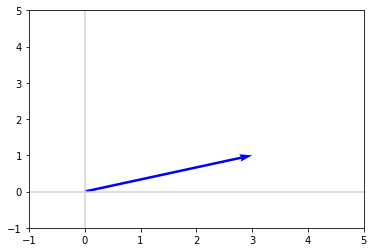

In [4]:
plot_vectors([v],['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

(-1.0, 4.0)

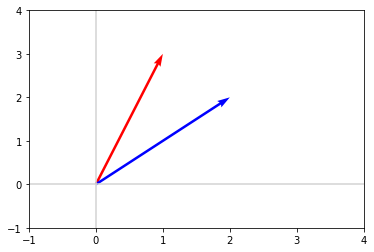

In [5]:
plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
plt.xlim(-1, 4)
plt.ylim(-1, 4)

In [6]:
#We can transform vectors by multiplying it by a matrix

In [7]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [8]:
Iv = np.dot(I, v)
Iv

array([3, 1])

##In contrast, consider this matrix (let's call it  𝐸 ) that flips vectors over the  𝑥 -axis:

In [9]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [10]:
#Now consider Ev
Ev = np.dot(E, v)
Ev

array([ 3, -1])

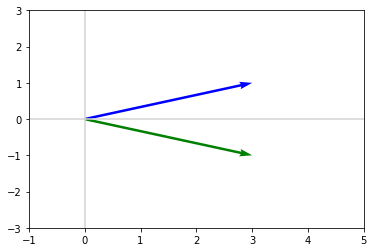

In [11]:
#We plot both vectors together 
plot_vectors([v, Ev], ['blue', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

In [12]:
#We see that the vector v has been transformed over the x axis

##Consider another matrix  𝐹 which flips vectors over the  𝑦 -axis:

In [13]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [14]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

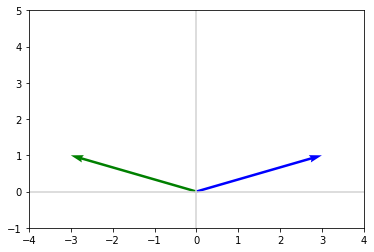

In [15]:
plot_vectors([v, Fv], ['blue', 'green'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

In [16]:
#We see that the vector v has been transformed over the y axis

Applying a flipping matrix is an example of an affine transformation: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., reflection), other common affine transformations include:

Scaling (changing the length of vectors)

Shearing (example of this on the Mona Lisa coming up shortly)

Rotation

A matrix can both rotate and reflect a vector

In [17]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [18]:
Av = np.dot(A, v)
Av

array([1, 4])

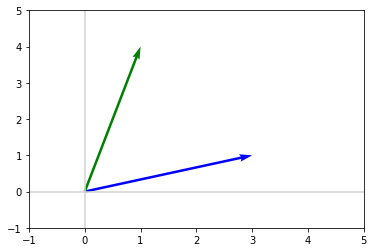

In [19]:
plot_vectors([v, Av], ['blue', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

If we have a matrix which each columns are vectors that are linearly independent, then we can transform these vectors

In [20]:
#Consider
v1 = np.array([3, 1])
v2 = np.array([2, 1])
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])

In [21]:
print(v1)
print(np.matrix(v).T)


[3 1]
[[3]
 [1]]


In [22]:
#We need to change them all to column vectors

In [23]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [24]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [25]:
#Consider

In [26]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [27]:
vectorfy(V, 2)

array([-3, -1])

In [28]:
A

array([[-1,  4],
       [ 2, -2]])

In [29]:
#We can use A to do transformation on each column

In [30]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

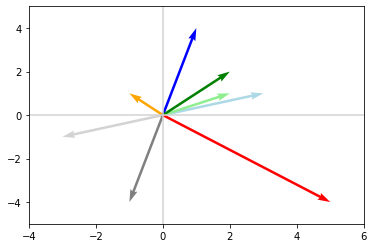

In [31]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

##Eigen Vectors

An eigenvector (eigen is German for "typical"; we could translate eigenvector to "characteristic vector") is a special vector  𝑣  such that when it is transformed by some matrix (let's say  𝐴 ), the product  𝐴𝑣  has the exact same direction as  𝑣 .

In [32]:
#That is the vector when transformed by some matrix A retains its spin

##Eigen Values

An eigenvalue is a scalar (traditionally represented as  𝜆 ) that simply scales the eigenvector  𝑣  such that the following equation is satisfied:

𝐴𝑣=𝜆𝑣

This scalar gives the factor of change in length of the eigen vectors

In [33]:
#We can use numpy to get our eigen vectors and values. Since we can solve it algebraically 

In [34]:
np.linalg.eig(A) 
 #This returns lambda and v

(array([ 1.37228132, -4.37228132]), array([[ 0.86011126, -0.76454754],
        [ 0.51010647,  0.64456735]]))

In [35]:
U = np.array([[-2,-2,4],[-4,1,2],[2,2,5]])
T = U.T
T

array([[-2, -4,  2],
       [-2,  1,  2],
       [ 4,  2,  5]])

In [36]:
EVal,EVec = np.linalg.eig(T )

In [37]:
EVal

array([-5.,  3.,  6.])

In [38]:
EVec

array([[ 0.81649658,  0.53452248,  0.05842062],
       [ 0.40824829, -0.80178373,  0.35052374],
       [-0.40824829, -0.26726124,  0.93472998]])

In [39]:
#We can show this is correct since T.v = lam.v


In [40]:
np.dot(T,EVec[:,0])

array([-4.0824829 , -2.04124145,  2.04124145])

In [41]:
np.dot(EVal[0],EVec[:,0]) #One of the lamdas 

array([-4.0824829 , -2.04124145,  2.04124145])

##Using Pytorch

In [42]:
#Py torch gives you in complex number, if the number is real the j will have a coefficient of 0

In [43]:
T_t = torch.tensor(([[-2, -4,  2],[-2,  1,  2],[ 4,  2,  5.]]))
T_t

tensor([[-2., -4.,  2.],
        [-2.,  1.,  2.],
        [ 4.,  2.,  5.]])

In [44]:
torch.linalg.eig(T_t)

torch.return_types.linalg_eig(eigenvalues=tensor([-5.0000+0.j,  3.0000+0.j,  6.0000+0.j]), eigenvectors=tensor([[-0.8165+0.j, -0.5345+0.j,  0.0584+0.j],
        [-0.4082+0.j,  0.8018+0.j,  0.3505+0.j],
        [ 0.4082+0.j,  0.2673+0.j,  0.9347+0.j]]))

In [45]:
torch.linalg.eig(T_t)

torch.return_types.linalg_eig(eigenvalues=tensor([-5.0000+0.j,  3.0000+0.j,  6.0000+0.j]), eigenvectors=tensor([[-0.8165+0.j, -0.5345+0.j,  0.0584+0.j],
        [-0.4082+0.j,  0.8018+0.j,  0.3505+0.j],
        [ 0.4082+0.j,  0.2673+0.j,  0.9347+0.j]]))

##Determinant of a matrix 

In [46]:
#If det(X) is zero then it cannot be inverted, then they are called singular matrix!

In [47]:
#Numpy
np.linalg.det(T)

-90.0

In [48]:
#Torch
torch.linalg.det(T_t) #It must be a float

tensor(-90.)

##Application of EigenValues and EigenVectors

In [49]:
#It has so many applications we will use them when the time comes!


The Eigen values product is always equal to the value of the determinant

In [51]:
EVal,EVec = np.linalg.eig(T )
EVal

array([-5.,  3.,  6.])

In [53]:
np.product(EVal)

-90.00000000000001

In [54]:
#The |det(A)| has a lot to say whether it contrast or expands the volume of the vector or tensor it interacts with

In [55]:
#Consider B 
B = np.array([[1,0],[0,1]])
B

array([[1, 0],
       [0, 1]])

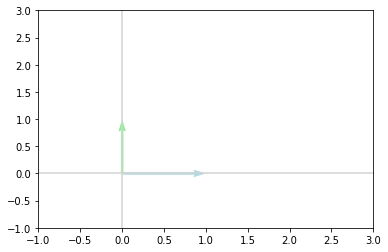

In [61]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

## Eigendecomposition

P = V/\V(inverse) since all diagonal matrices are Abelian. And lamda  is to arrange the eigen values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix 